### Importing Libraries
- Essential libraries for data handling, preprocessing, model training, and evaluation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Step 1: Data Collection
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target  # target column

# Display the first few rows of raw data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Data Collection
- Load the breast cancer dataset.
- Convert it into a DataFrame.
- Add a 'Target' column (1 = Benign, 0 = Malignant).
- Display the first five rows to inspect raw data.

In [3]:
# Step 2: Data Preprocessing - Checking for missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


### Checking for Missing Values
- `df.info()` shows data types and non-null values.
- `df.isnull().sum()` checks for any missing values in each column.

In [4]:
# Select one feature for visualization, e.g., 'mean radius'
feature = 'mean radius'
X_single = df[[feature]].values
y = df['Target'].values

In [5]:
# Standardize the selected feature
scaler_single = StandardScaler()
X_single_scaled = scaler_single.fit_transform(X_single)

In [6]:
# Train logistic regression on just this one feature
model_single = LogisticRegression()
model_single.fit(X_single_scaled, y)

LogisticRegression()

In [10]:
# Generate a smooth range of values for plotting the sigmoid
x_vals = np.linspace(X_single_scaled.min(), X_single_scaled.max(), 300).reshape(-1, 1)
y_probs = model_single.predict_proba(x_vals)[:, 1]

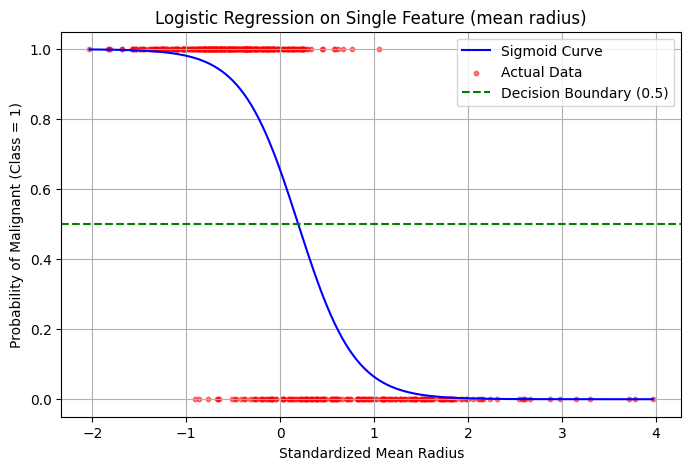

In [8]:
# Plot the sigmoid curve
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_probs, color='blue', label='Sigmoid Curve')
plt.scatter(X_single_scaled, y, color='red', s=10, alpha=0.5, label='Actual Data')
plt.axhline(0.5, color='green', linestyle='--', label='Decision Boundary (0.5)')
plt.title('Logistic Regression on Single Feature (mean radius)')
plt.xlabel('Standardized Mean Radius')
plt.ylabel('Probability of Malignant (Class = 1)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Normalize features
scaler = StandardScaler()
df[data.feature_names] = scaler.fit_transform(df[data.feature_names])

# Display dataset after normalization
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


### Feature Normalization
- `StandardScaler()` standardizes features for better model performance.
- Observe changes in the dataset after normalization.

In [14]:
X = df[data.feature_names]  # Independent variables
y = df['Target']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### Splitting Data into Training and Testing Sets
- 80% training and 20% testing.
- Displays the shape of each set to ensure proper splitting.

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Model Training
- We use `LogisticRegression()` as a classifier.
- Train the model using `fit()` on training data.

In [16]:
y_pred = model.predict(X_test)

# Convert predictions and actual values into a DataFrame
results_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})

# Display first few rows
results_df.head(20)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1


### Model Predictions
- Use `predict()` to classify test samples.
- Display actual vs. predicted values.

In [18]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.9737
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



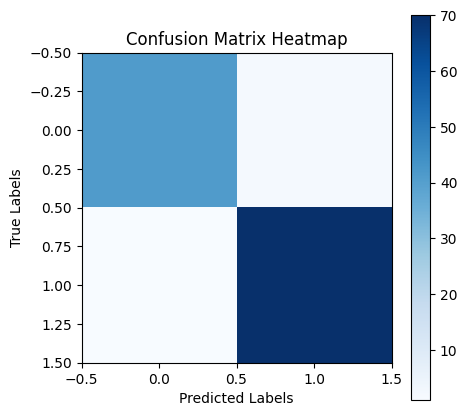

In [19]:
  plt.figure(figsize=(5, 5))
  plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix Heatmap')
  plt.colorbar()
  plt.show()

### Confusion Matrix Visualization
- Visual representation of classification performance.
- Darker colors indicate more correct predictions.

In [ ]:
sample = X_test.iloc[:5]
predictions = model.predict(sample)

# Display the new sample and predictions
pd.DataFrame(sample, columns=data.feature_names).assign(Predicted=predictions)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Predicted
204,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,...,-0.168905,-0.333935,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958,1
70,1.366877,0.470149,1.302886,1.351264,-0.446227,-0.027309,0.241064,0.789060,-0.838325,-1.160679,...,0.147012,1.746605,1.732277,-0.572873,-0.131459,-0.016736,0.978975,-0.565828,-1.000578,0
131,0.378508,0.044296,0.400820,0.267377,0.913744,0.340350,0.725686,0.824140,0.435855,-0.685782,...,0.052562,0.525386,0.484159,0.974533,-0.094562,0.512911,0.560244,-0.103143,-0.208132,0
431,-0.490575,-0.374576,-0.432457,-0.532101,0.643316,0.516599,-0.142993,-0.539846,-0.002259,1.165609,...,-0.450625,-0.525756,-0.641257,0.553709,0.054930,-0.152986,-0.622863,-0.557739,0.534440,1
540,-0.734828,-1.128546,-0.713374,-0.716683,0.247636,0.145150,-0.269044,-0.592724,0.023298,0.711976,...,-0.976611,-0.848337,-0.743216,0.093432,-0.270137,-0.443716,-0.691687,-0.924975,-0.144403,1


### Predicting on New Data
- Take a small sample from test data.
- Display features and predicted class.